# Customer Churn Prediction

## Import Libraries

In [93]:
!pip install -q cufflinks # Cufflinks is a third-party wrapper library around Plotly

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline()
init_notebook_mode(connected=False)

Output hidden; open in https://colab.research.google.com to view.

## Import Dataset

In [95]:
bank_df = pd.read_csv("/content/drive/MyDrive/Afame Technologies/Churn.csv")

In [96]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [97]:
bank_df.shape

(10000, 14)

In [98]:
bank_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [99]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [100]:
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [101]:
bank_df = bank_df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [102]:
bank_df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [103]:
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [104]:
bank_df.shape

(10000, 11)

## Data Visualization

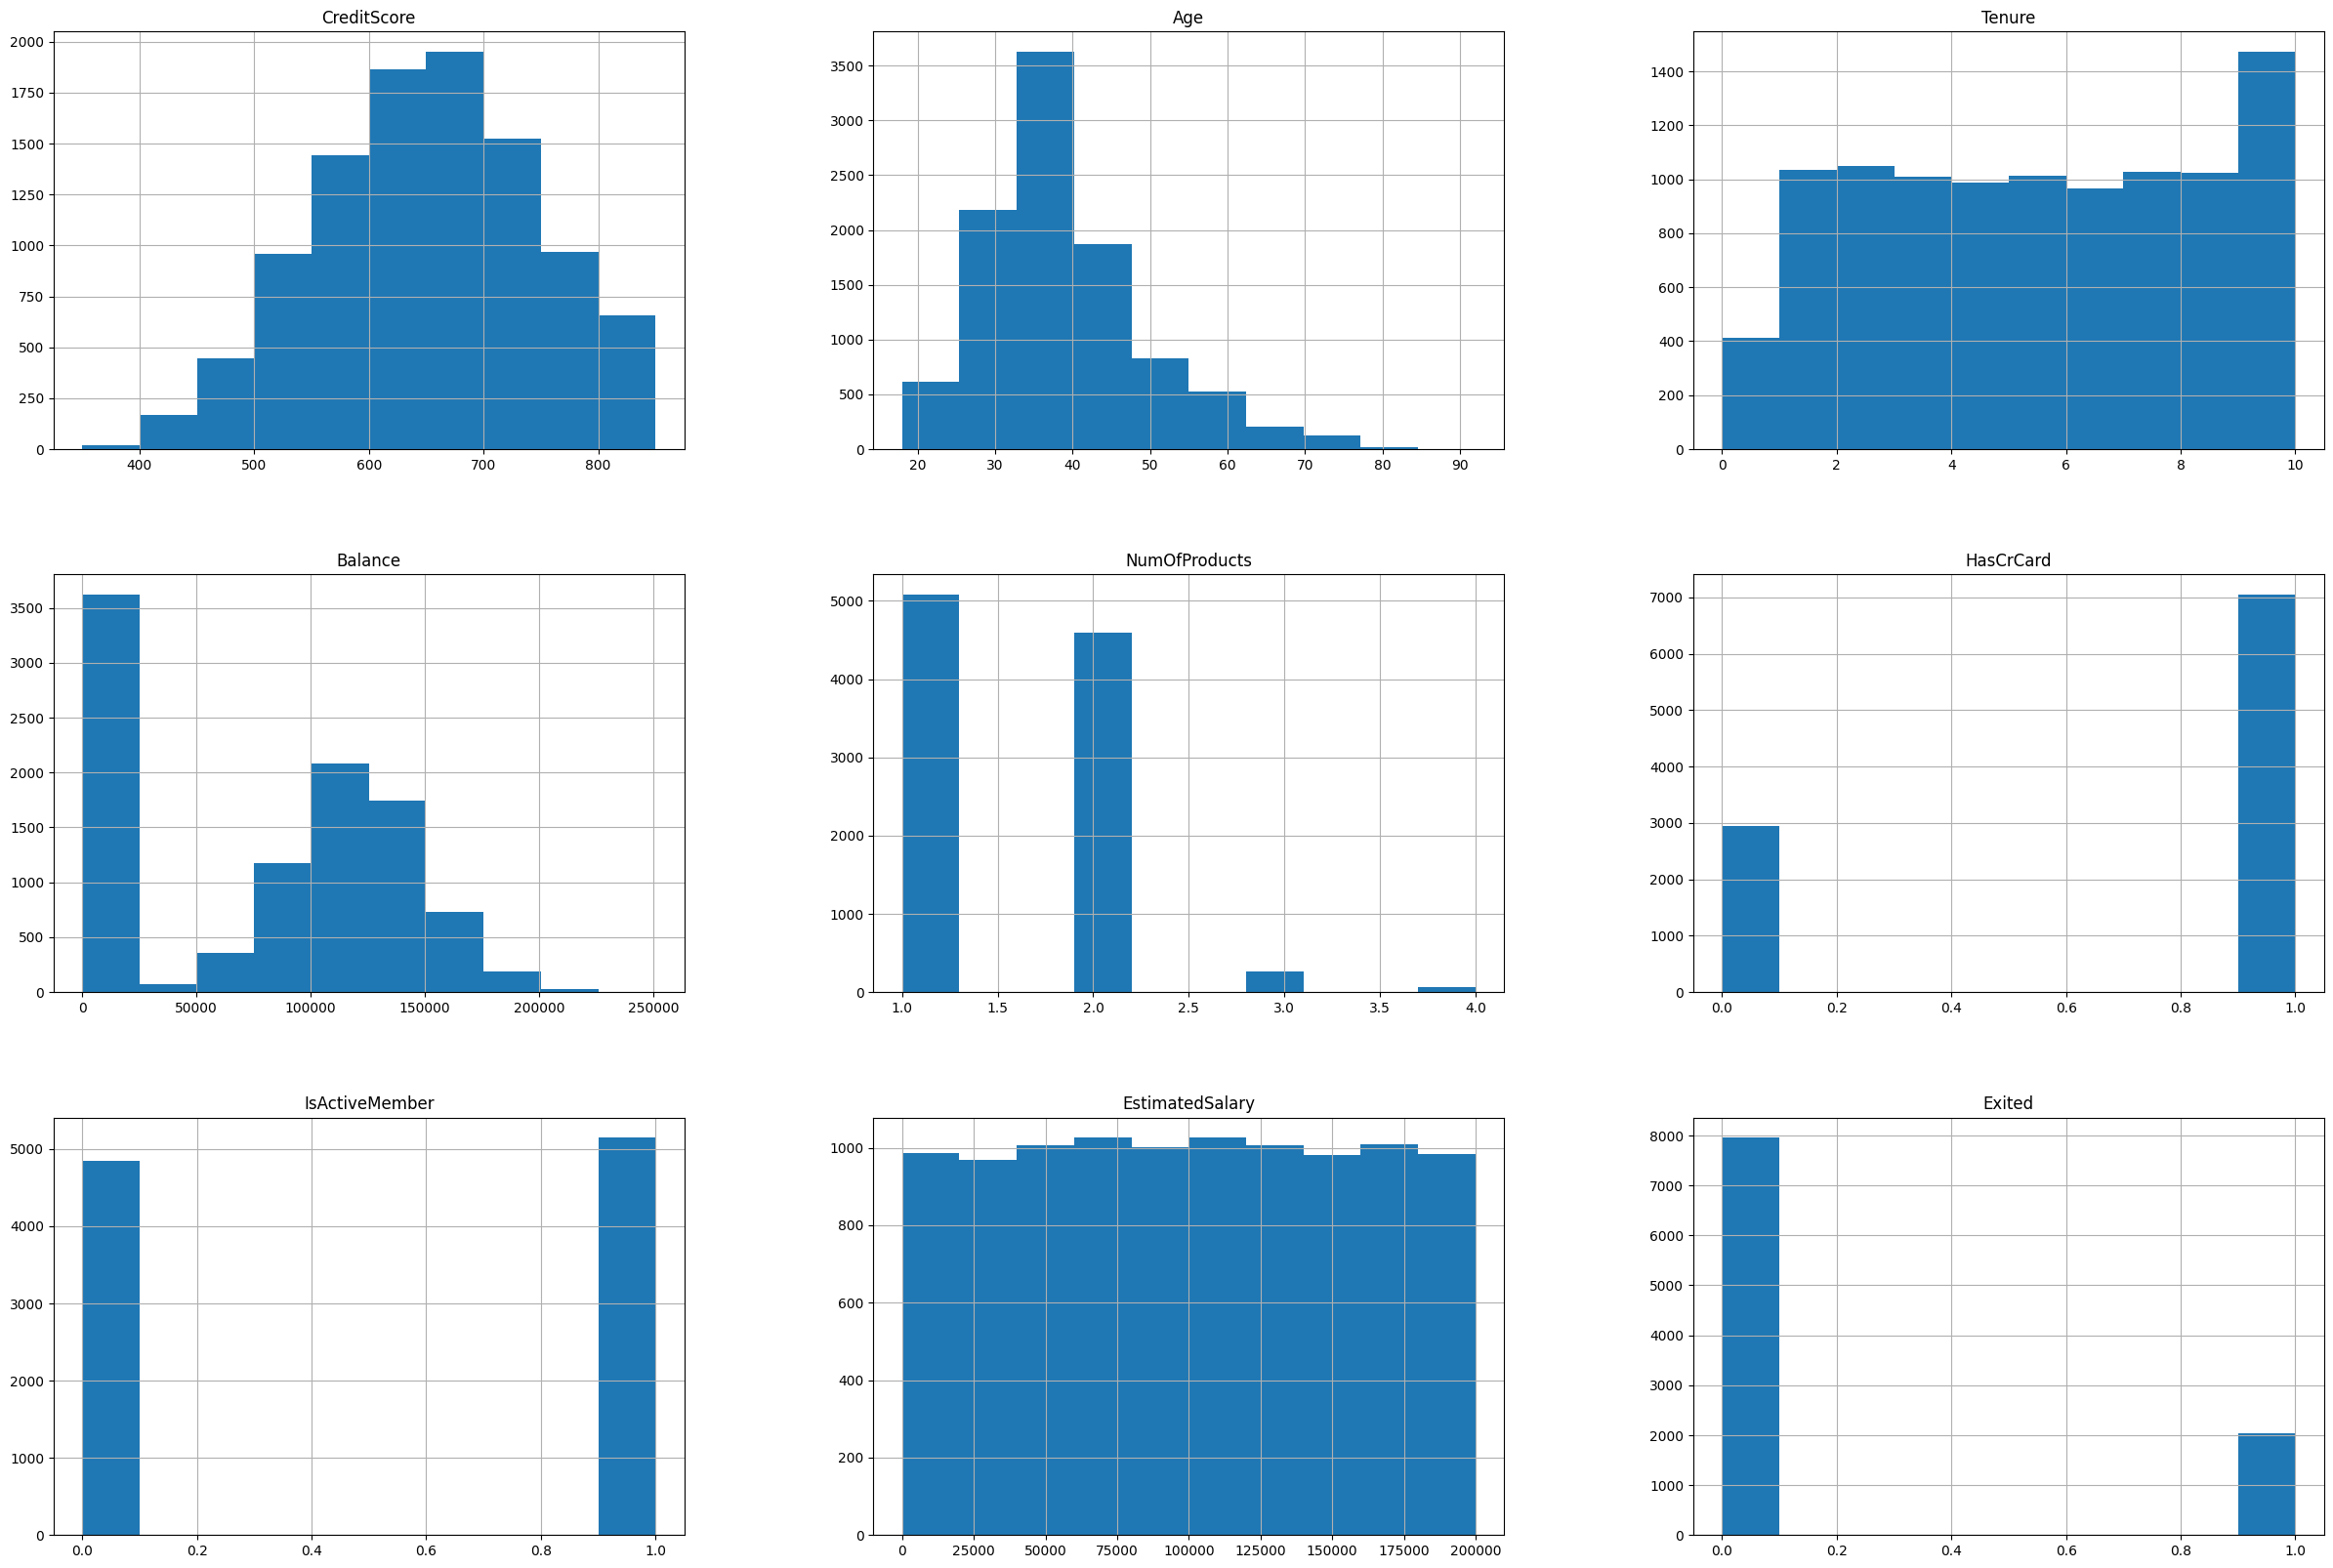

In [105]:
bank_df.hist(figsize=(30,20))
plt.show()

In [106]:
bank_df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [107]:
import plotly.graph_objects as go

In [108]:
fig = go.Figure( go.Pie(labels = ["Retain", "Exited"], values=bank_df["Exited"].value_counts()))
fig.show(renderer='colab')

<Axes: xlabel='HasCrCard', ylabel='count'>

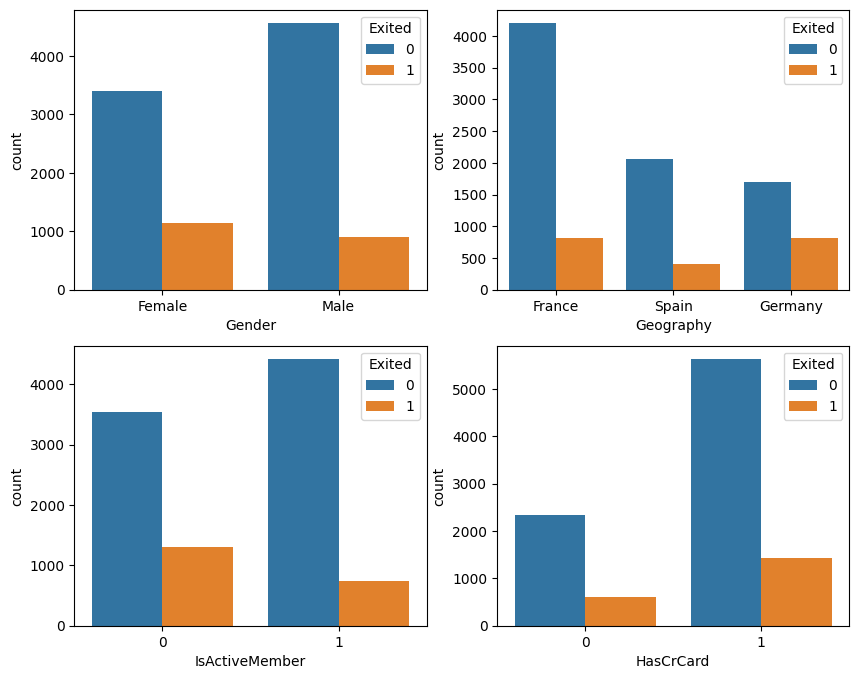

In [109]:
fig, axr = plt.subplots(2, 2, figsize=(10,8))
sns.countplot(x='Gender', hue = 'Exited',data = bank_df, ax=axr[0][0])
sns.countplot(x='Geography', hue = 'Exited',data = bank_df, ax=axr[0][1])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = bank_df, ax=axr[1][0])
sns.countplot(x='HasCrCard', hue = 'Exited',data = bank_df, ax=axr[1][1])

<Axes: xlabel='Exited', ylabel='NumOfProducts'>

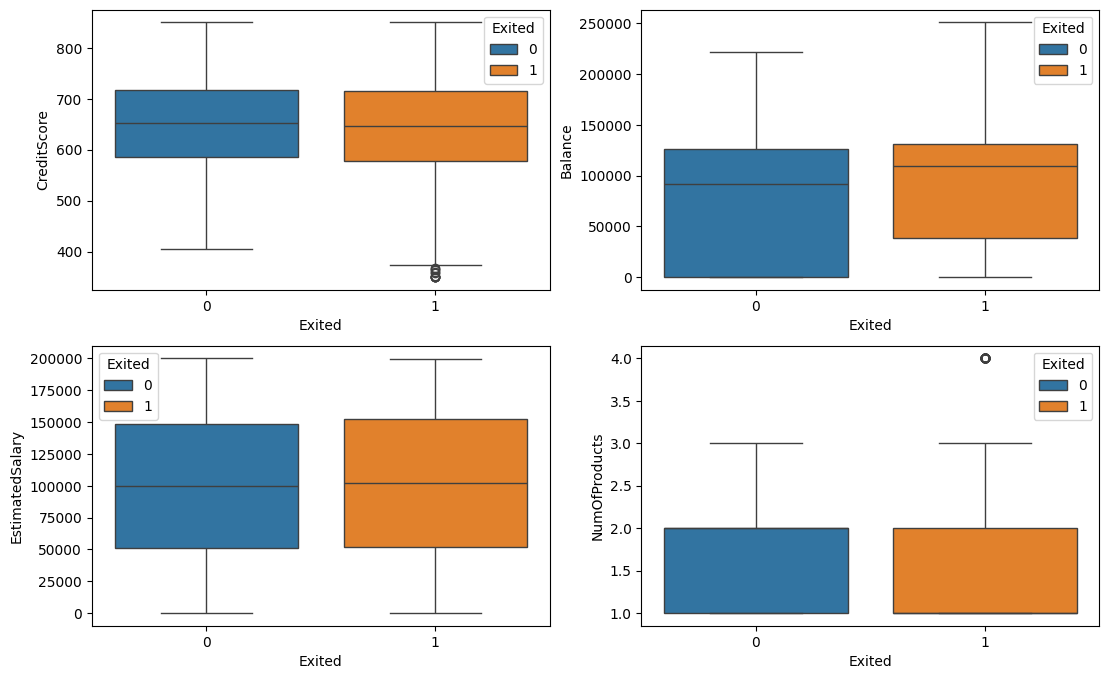

In [110]:
fig, axr = plt.subplots(2, 2, figsize=(13,8))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = bank_df, ax=axr[0][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = bank_df, ax=axr[0][1])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = bank_df, ax=axr[1][0])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = bank_df, ax=axr[1][1])

Text(0.5, 1.0, 'Distribution of Credit Score by Churn')

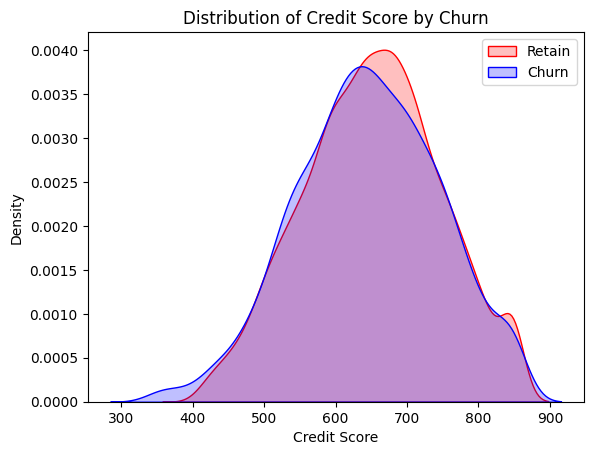

In [111]:
ax = sns.kdeplot(bank_df.CreditScore[(bank_df['Exited'] == 0)],
                 color="Red", fill=True)
ax = sns.kdeplot(bank_df.CreditScore[(bank_df['Exited'] == 1)],
                 color="Blue", fill=True)

ax.legend(["Retain", "Churn"], loc="upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Credit Score")
ax.set_title("Distribution of Credit Score by Churn")

Text(0.5, 1.0, 'Distribution of Balance by Churn')

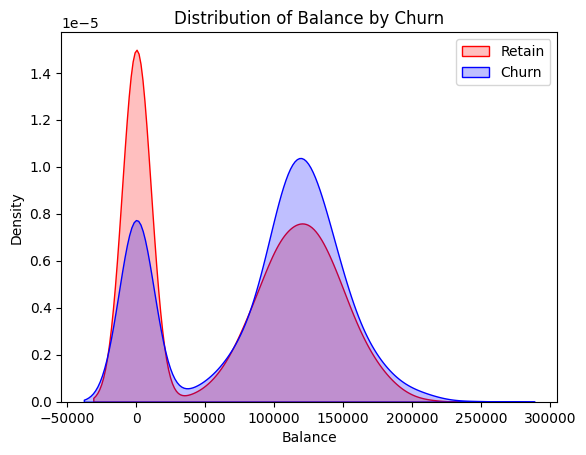

In [112]:
ax = sns.kdeplot(bank_df.Balance[(bank_df['Exited'] == 0)],
                 color="Red", fill=True)
ax = sns.kdeplot(bank_df.Balance[(bank_df['Exited'] == 1)],
                 color="Blue", fill=True)

ax.legend(["Retain", "Churn"], loc="upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Balance")
ax.set_title("Distribution of Balance by Churn")

## Feature Engineering

In [113]:
bank_df['BalanceSalaryRatio'] = bank_df.Balance/bank_df.EstimatedSalary
bank_df['TenureByAge'] = bank_df.Tenure/(bank_df.Age)

In [114]:
bank_df.loc[bank_df.HasCrCard == 0, 'HasCrCard'] = -1
bank_df.loc[bank_df.IsActiveMember == 0, 'IsActiveMember'] = -1
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619
1,608,Spain,Female,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390
2,502,France,Female,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476
3,699,France,Female,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512


In [115]:
cat_var = ['Geography', 'Gender']
lst = list()
for i in cat_var:
    if (bank_df[i].dtype == object):
        for j in bank_df[i].unique():
            bank_df[i+'_'+j] = np.where(bank_df[i] == j,1,0)
        lst.append(i)
bank_df = bank_df.drop(lst, axis=1)
bank_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0,1,0
1,608,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,0,1,0,1,0
2,502,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,1,0,0,1,0
3,699,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,1,0,1,0


In [116]:
bank_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0,1,0
1,608,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,0,1,0,1,0
2,502,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,1,0,0,1,0
3,699,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,1,0,1,0


In [117]:
columns_scale = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge']

min = bank_df[columns_scale].min()
max = bank_df[columns_scale].max()
bank_df[columns_scale] = (bank_df[columns_scale]-min)/(max-min)
bank_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.085714,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,-1,1,0.562709,0,0.000070,0.043902,0,1,0,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,-1,0.569654,1,0.000132,0.342857,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,-1,-1,0.469120,0,0.000000,0.046154,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.000150,0.083721,0,1,0,1,0


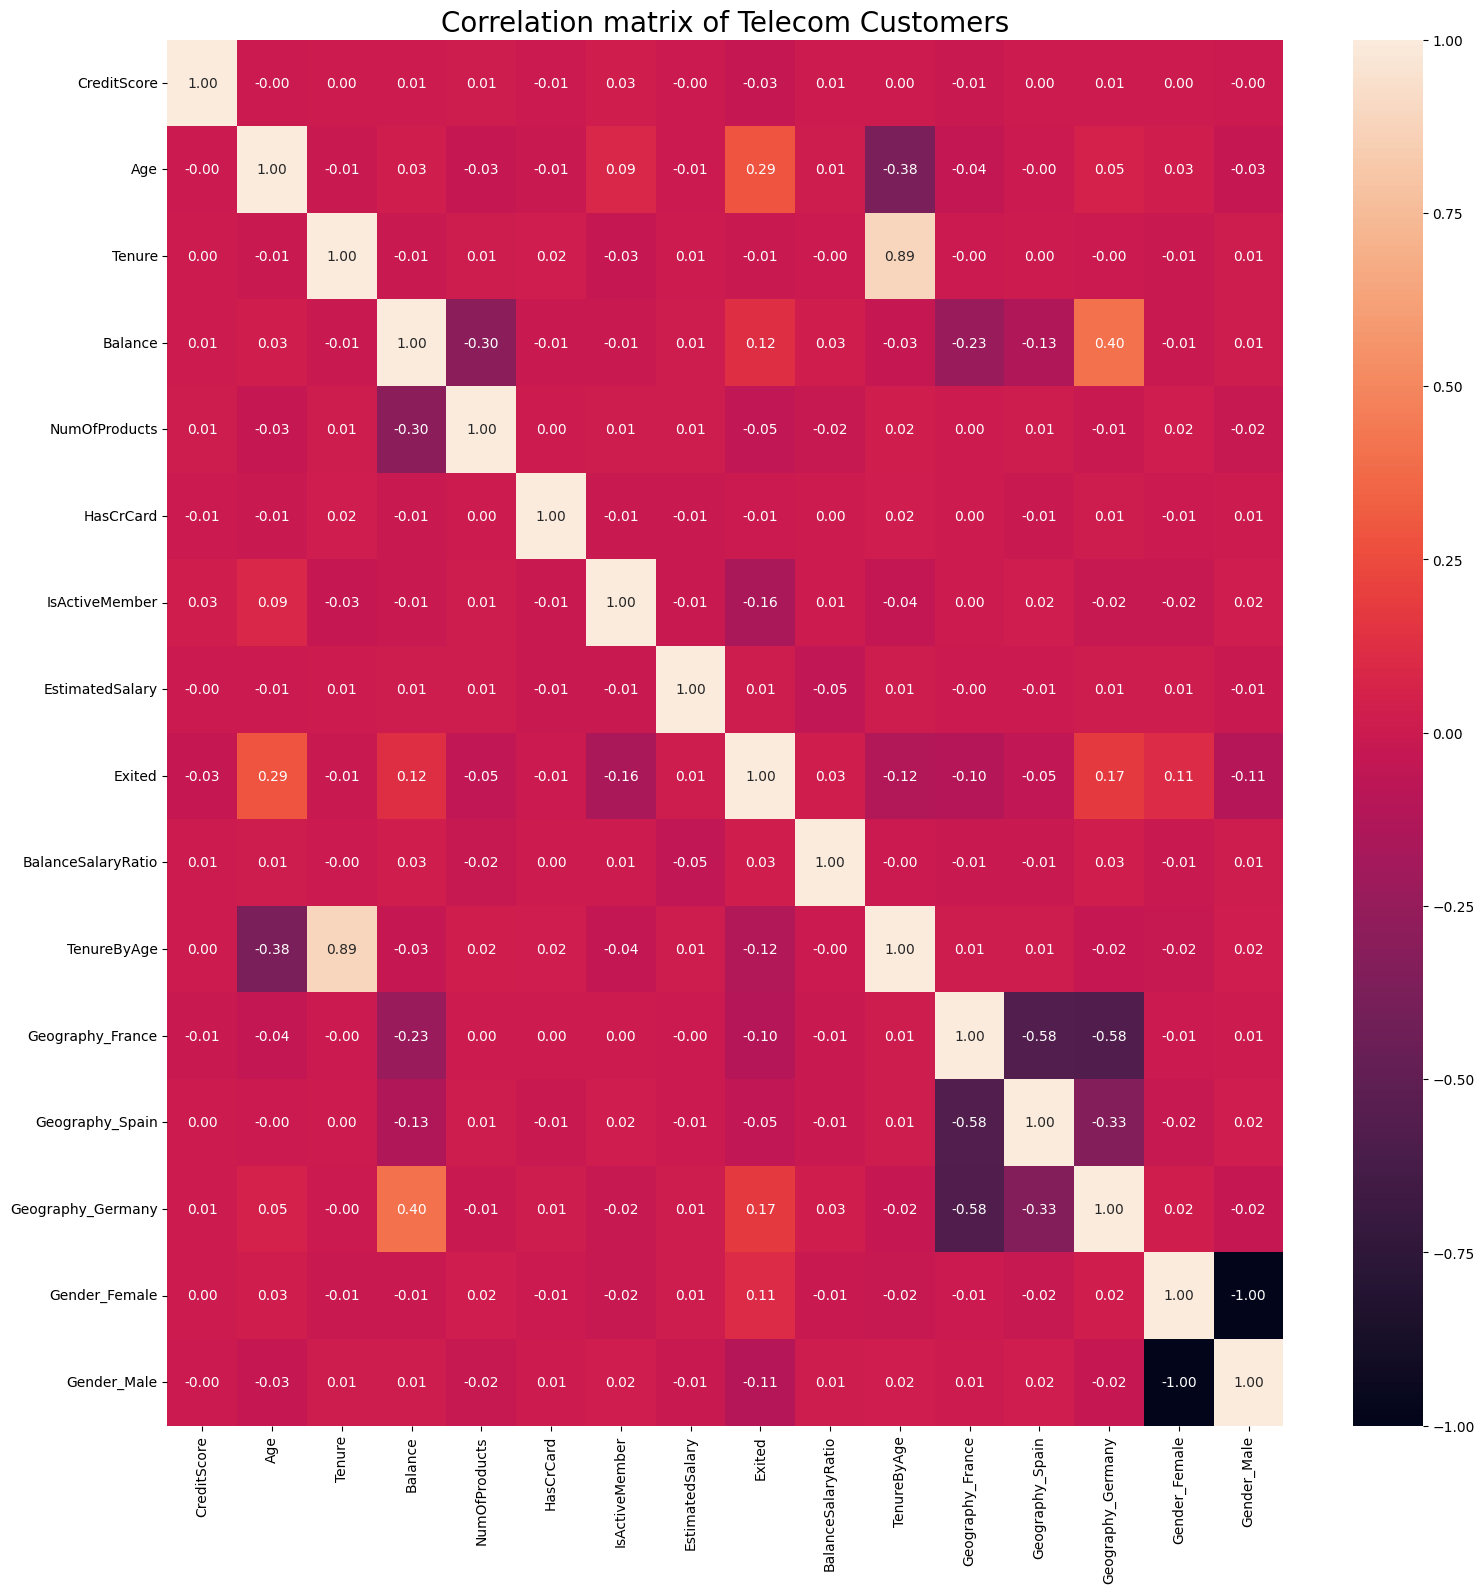

In [118]:

corr_matrix = bank_df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot = True, fmt='0.2f')
plt.title("Correlation matrix of Telecom Customers", fontsize=20)
plt.show()

In [119]:
X = bank_df.drop(["Exited"], axis='columns')
y = bank_df["Exited"]

In [120]:
print(X.shape)
print(y.shape)

(10000, 15)
(10000,)


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [122]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 15)
(8000,)
(2000, 15)
(2000,)


In [123]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

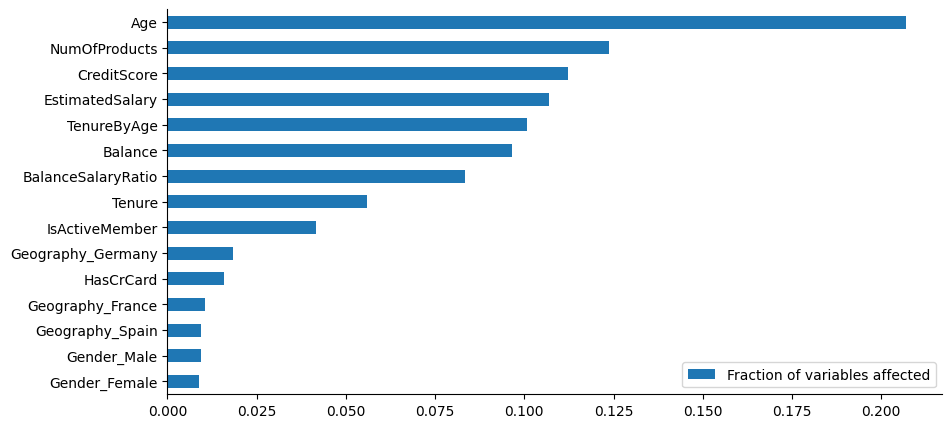

In [124]:
# Plotting the feature importance score

feat_scores = pd.DataFrame( {"Fraction of variables affected" : rf.feature_importances_}, index=X.columns)
feat_scores = feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind='barh', figsize=(10,5))
sns.despine()

## Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [126]:
y_predict = model_LR.predict(X_test)

In [127]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.59      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



<Axes: >

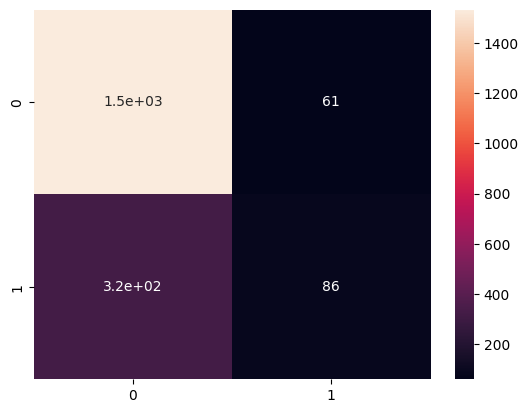

In [128]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

## Support Vector Machine (SVM)

In [129]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

model_svm = LinearSVC(max_iter=10000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)

CalibratedClassifierCV(estimator=LinearSVC(max_iter=10000))

In [130]:
y_predict = model_svm.predict(X_test)

In [131]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.57      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



<Axes: >

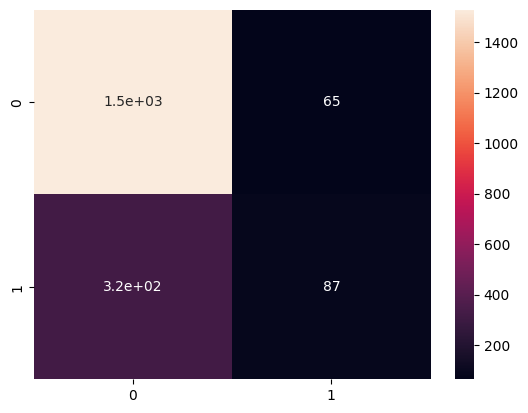

In [132]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [133]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [134]:
y_predict = model_rf.predict(X_test)

In [135]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.44      0.56       407

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



<Axes: >

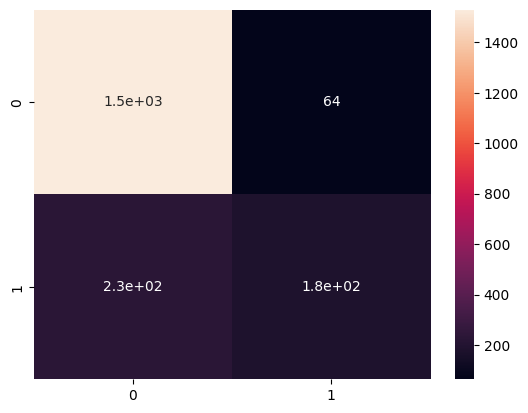

In [136]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

## Gradient Boosting Classifier

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [138]:
y_predict = model_gb.predict(X_test)

In [139]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.73      0.46      0.56       407

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.86      0.84      2000



<Axes: >

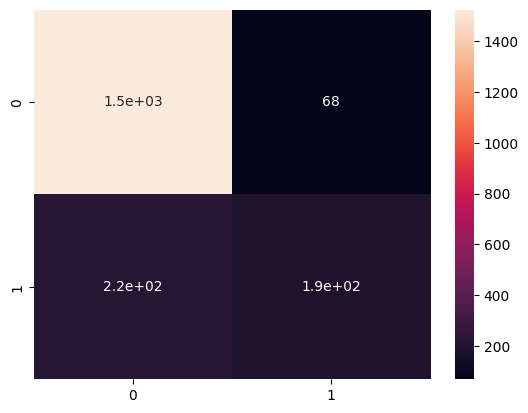

In [140]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [141]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [145]:
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label= 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label= 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_gb.predict_proba(X_test)[:, 1], pos_label= 1)

In [146]:
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_gb.predict_proba(X_test)[:, 1])

In [147]:
print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("Gradient Boosting: ", auc_score4) # Gradient Boosting

Logistic Regression:  0.7656146130722403
Support Vector Machine:  0.7697867358884309
Random Forest:  0.8415379940803669
Gradient Boosting:  0.8549797871831769


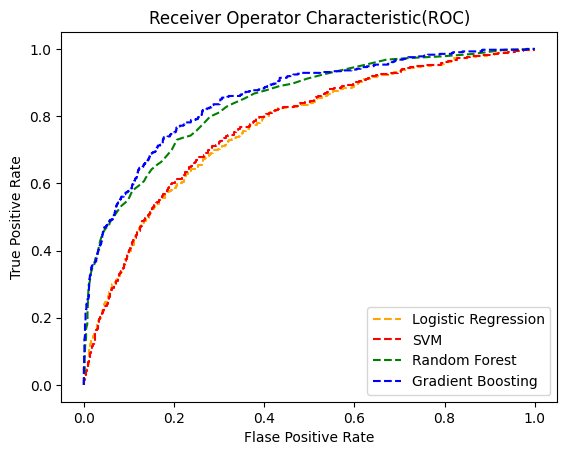

In [149]:
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label="Logistic Regression")
plt.plot(fpr2, tpr2, linestyle='--', color='red', label="SVM")
plt.plot(fpr3, tpr3, linestyle='--', color='green', label="Random Forest")
plt.plot(fpr4, tpr4, linestyle='--', color='blue', label="Gradient Boosting")

plt.title("Receiver Operator Characteristic(ROC)")
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

The ROC curve shows the performance of four models: Logistic Regression, SVM, Random Forest, and Gradient Boosting. Among these, the **Gradient Boosting model (blue dashed line) demonstrates the best performance**, as its curve is closest to the top-left corner of the plot, indicating a higher true positive rate and a lower false positive rate compared to the other models.